#### Importing Libraries

In [1]:
import numpy as np         # Numpy for arrays...
import pandas as pd        # Pandas for dataframe...

In [2]:
import matplotlib.pyplot as plt       # Matplotlib for visualization...
import seaborn as sns                 # Seaborn for visualization...
import plotly.express as px           # Plotly for visualization...
from tensorflow.python.keras.callbacks import TensorBoard    # Tensorboard for visualization...

In [3]:
import cv2                           # Image libraries...
import PIL.Image as Image             # Image libraries...

#### Data Pre-processing

In [4]:
NormalTrain = np.load("D:/Projects/Xrays-Chest-Scanning/Dataset/train_Normal_128.npy")     # Loading the numpy data...
NormalTrain.shape

(1341, 128, 128, 1)

In [5]:
n1 = []
for i in range(0, 1341):
    n1.append(0)

In [6]:
BacteriaTrain = np.load("D:/Projects/Xrays-Chest-Scanning/Dataset/train_bacteria_128.npy")
BacteriaTrain.shape

(2530, 128, 128, 1)

In [7]:
for i in range(0, 2530):
    n1.append(1)
len(n1)

3871

In [8]:
VirusTrain = np.load("D:/Projects/Xrays-Chest-Scanning/Dataset/train_Virus_128.npy")
VirusTrain.shape

(1345, 128, 128, 1)

In [9]:
for i in range(0, 1345):
    n1.append(2)

In [10]:
VirusTest = np.load("D:/Projects/Xrays-Chest-Scanning/Dataset/test_Virus_128.npy")
VirusTest.shape

(148, 128, 128, 1)

In [11]:
for i in range(0, 148):
    n1.append(2)

In [12]:
BacteriaTest = np.load("D:/Projects/Xrays-Chest-Scanning/Dataset/test_bacteria_128.npy")
BacteriaTest.shape

(242, 128, 128, 1)

In [13]:
for i in range(0, 242):
    n1.append(1)

In [14]:
X = np.row_stack([NormalTrain, BacteriaTrain, VirusTrain, BacteriaTest, VirusTest])
X.shape

C:\Users\Wahe Guru\AppData\Local\Temp\ipykernel_22600\3253015138.py:1: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  X = np.row_stack([NormalTrain, BacteriaTrain, VirusTrain, BacteriaTest, VirusTest])


(5606, 128, 128, 1)

In [15]:
len(n1)

5606

In [16]:
Y = np.array(n1).reshape(-1, 1)
Y.shape

(5606, 1)

#### Feature Extraction

    Labels Dictionary ==> Normal : 0, Bacteria Infected : 1, Virus Infected : 2

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=42, stratify=Y)   # Splitting dataset...
print("Xtrain shape :",Xtrain.shape)
print("Xtest shape :",Xtest.shape)
print("Ytrain shape :",Ytrain.shape)
print("Ytest shape :",Ytest.shape)

Xtrain shape : (4204, 128, 128, 1)
Xtest shape : (1402, 128, 128, 1)
Ytrain shape : (4204, 1)
Ytest shape : (1402, 1)


In [18]:
def ShowXRaysImage(img, imgLabel):     # Function created for viewing the Images...
    title = ""
    if imgLabel == 0:   # If-else statements as per the Image label...
        title = "Normal Xrays"
    elif imgLabel == 1:
        title = "Bacteria Infected Xrays"
    elif imgLabel == 2:
        title = "Virus Infected Xrays"
    else:
        title = "Xrays not properly defined"
    plt.title(title)
    plt.imshow(img, interpolation="nearest")    # Plotting the Image...
    plt.show()

    Few Images of Xrays of Virus Infected Chests.

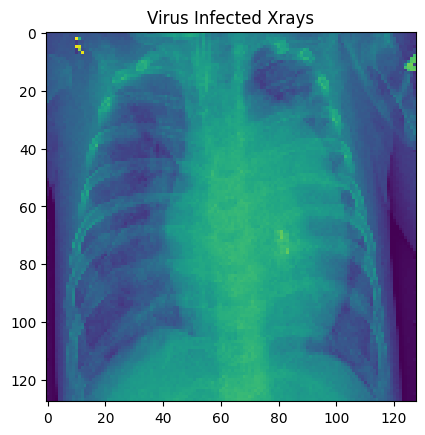

In [19]:
ShowXRaysImage(Xtrain[0], Ytrain[0])

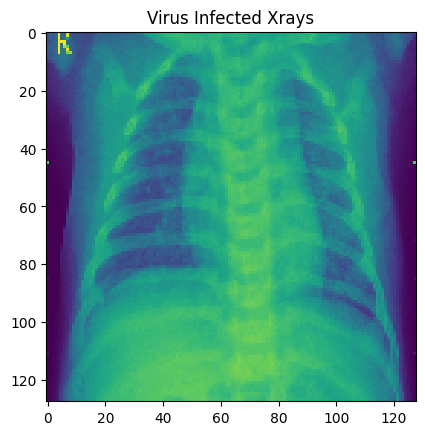

In [20]:
ShowXRaysImage(Xtrain[5], Ytrain[5])

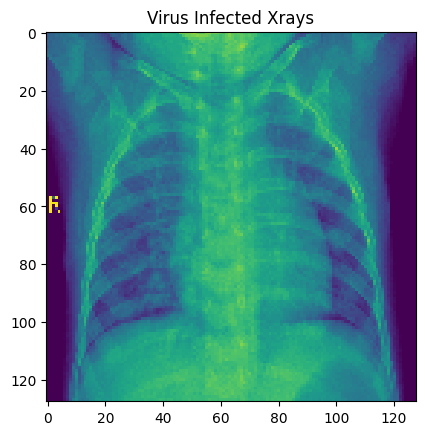

In [21]:
ShowXRaysImage(Xtrain[15], Ytrain[15])

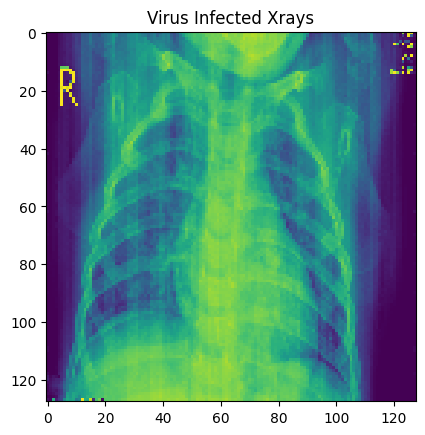

In [22]:
ShowXRaysImage(Xtrain[26], Ytrain[26])

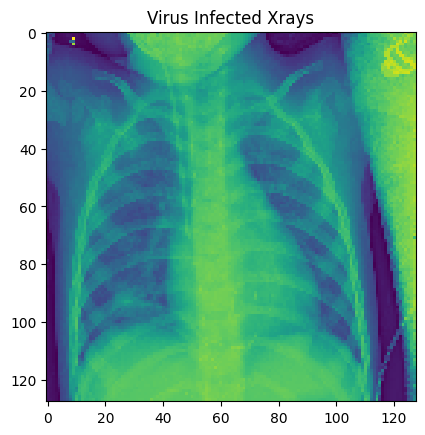

In [23]:
ShowXRaysImage(Xtrain[53], Ytrain[53])

    Few Images of Xrays of Bacteria Infected Chests

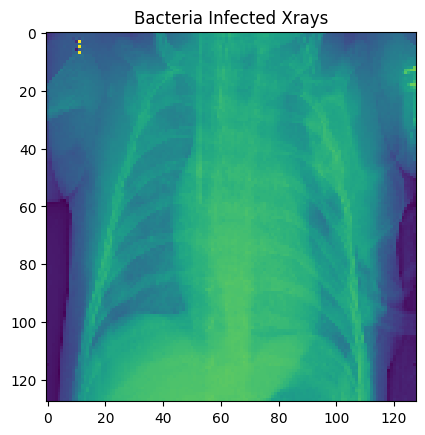

In [24]:
ShowXRaysImage(Xtrain[150], Ytrain[150])

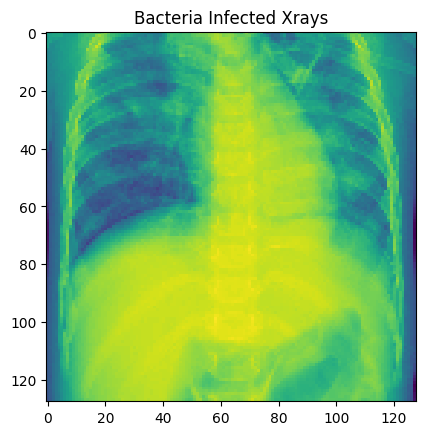

In [25]:
ShowXRaysImage(Xtrain[47], Ytrain[47])

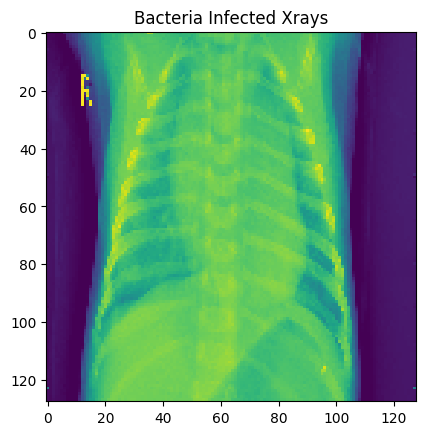

In [26]:
ShowXRaysImage(Xtrain[52], Ytrain[52])

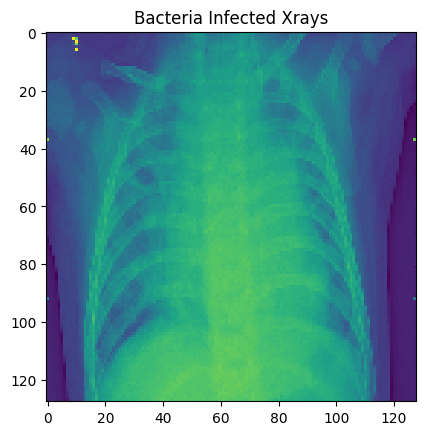

In [27]:
ShowXRaysImage(Xtrain[4], Ytrain[4])

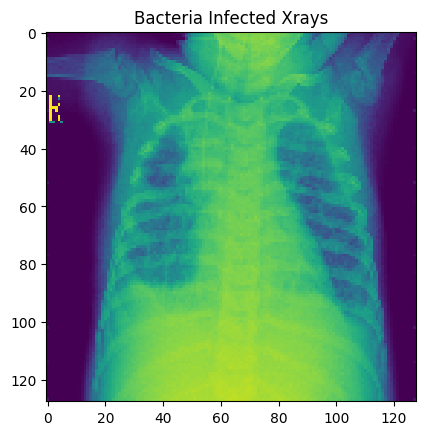

In [28]:
ShowXRaysImage(Xtrain[11], Ytrain[11])

    Few Images of Xrays of Normal Chests

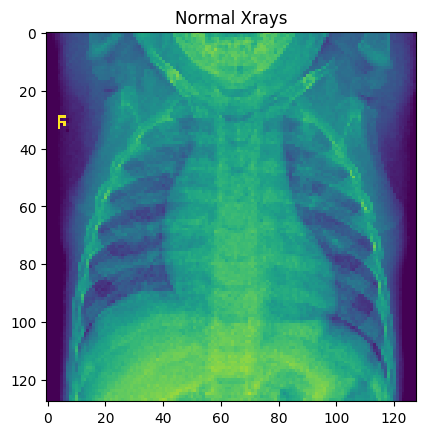

In [29]:
ShowXRaysImage(Xtrain[1], Ytrain[1])

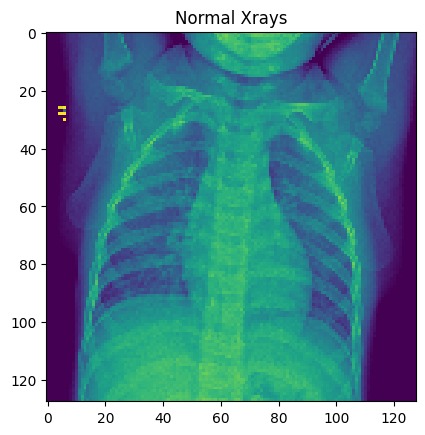

In [30]:
ShowXRaysImage(Xtrain[8], Ytrain[8])

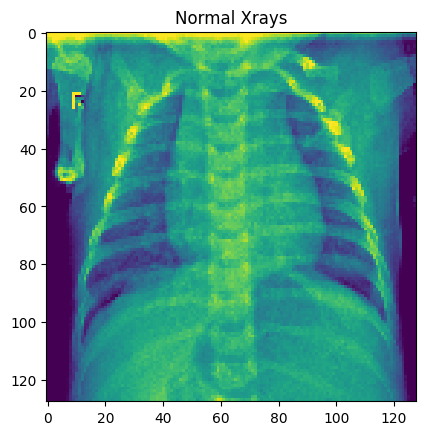

In [31]:
ShowXRaysImage(Xtrain[20], Ytrain[20])

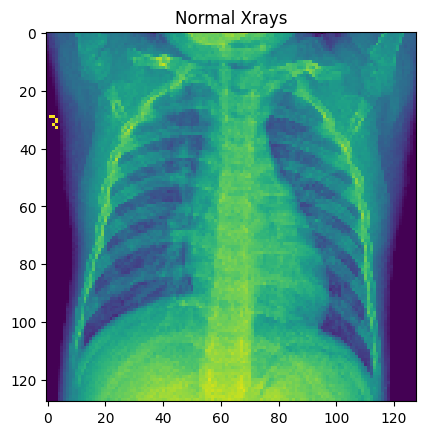

In [32]:
ShowXRaysImage(Xtrain[74], Ytrain[74])

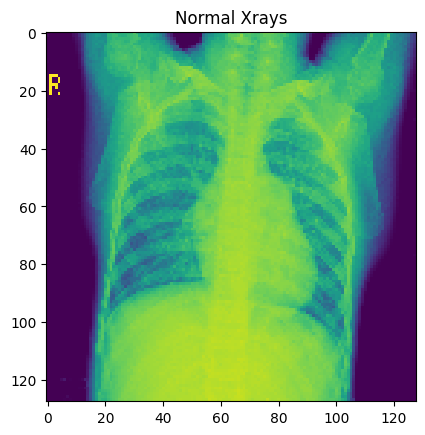

In [33]:
ShowXRaysImage(Xtrain[68], Ytrain[68])

In [34]:
Xtrain = Xtrain/255
Xtest = Xtest/255

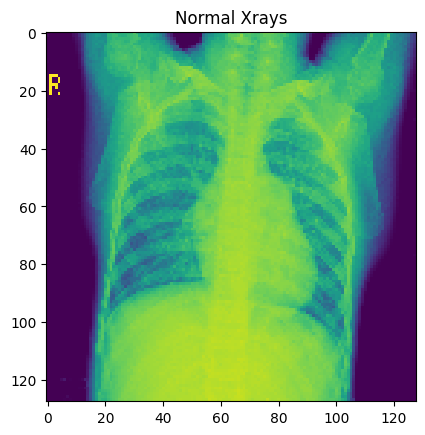

In [35]:
ShowXRaysImage(Xtrain[68], Ytrain[68])

#### Model Training

    First Model

In [36]:
import tensorflow as tf         # Importing Tensorflow library...
from tensorflow import keras    # Importing Keras wrapper library...

In [37]:
from keras import Sequential    # Importing Sequential neural network...
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten   # Importing layers...
from keras.activations import relu, softmax    # Importing activation functions...

classes = 3
ConvolutionalNetworkI = Sequential([
    Conv2D(filters=32, input_shape=(128, 128, 1), kernel_size=5, activation="relu", name="conv1", padding="same"),
    AveragePooling2D(pool_size=(3, 3)),
    Conv2D(filters=16, kernel_size=4, activation="relu", name="conv2", padding="same"),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(name="Flatten"),                # Output shape = 16 neurons, Input shape = 7056 neurons...
    Dense(16, relu, name="dense1"),         # Output shape = 16 neurons, Input shape = 16 neurons...
    Dense(8, relu, name="dense2"),          # Output shape = 8 neurons, Input shape = 16 neurons...
    Dense(classes, softmax, name="dense3")  # Output shape = 3 neurons, Input shape = 8 neurons...
])

d:\Projects\Xrays-Chest-Scanning\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
from keras.losses import sparse_categorical_crossentropy

ConvolutionalNetworkI.compile(
    optimizer = "rmsprop",       # RMSprop algorithm to be used...
    loss = sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [39]:
ConvolutionalNetworkI.build(input_shape=(None,128, 128, 1))
ConvolutionalNetworkI.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 42, 42, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 42, 42, 16)     │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 21, 21, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 7056)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 16)             │       112,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,115 (477.01 KB)

 Trainable params: 122,115 (477.01 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:

from tensorflow.keras.callbacks import TensorBoard

Tensorboard = TensorBoard(log_dir="Graphs/Model1", histogram_freq=1)

# Fit the model
ConvolutionalNetworkI.fit(Xtrain, Ytrain, epochs=10, callbacks=[Tensorboard])

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.5094 - loss: 1.0163
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.6597 - loss: 0.8139
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.7058 - loss: 0.7522
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.7311 - loss: 0.6892
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.7296 - loss: 0.6700
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.7421 - loss: 0.6405
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.7531 - loss: 0.5931
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.7563 - loss: 0.5824
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.7766 - loss: 0.5424
Epoch 10/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.7701 - loss: 0.5385


In [44]:
from keras import Sequential     # Importing sequential neural network...
from keras.layers import MaxPooling2D, Dense        # Importing the required layers...
from keras.activations import relu, linear, softmax   # Importing activation functions...

classes = 3
ConvolutionalNetworkII = Sequential([
    Conv2D(filters=128, input_shape=(128, 128, 1), kernel_size=3, activation="relu", name="conv1", padding="same"),      # Convolutions...
    MaxPooling2D(pool_size=(2, 2)),   # Max Pooling...
    Conv2D(filters=64, kernel_size=3, activation="relu", name="conv2", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),   # Max Pooling...
    Conv2D(filters=32, kernel_size=3, activation="relu", name="conv3", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),   # Max Pooling...
    Flatten(name="Flatten"),               # Output layer = 8192 neurons, Input layer = 16 x 16 x 32 neurons...
    Dense(32, relu, name="dense1"),        # Output layer = 32 neurons, Input layer = 8192 neurons...
    Dense(16, relu, name="dense2"),        # Output layer = 16 neurons, Input shape = 32 neurons...
    Dense(8, linear, name="dense3"),       # Output layer = 8 neurons, Input layer = 16 neurons...
    Dense(classes, softmax, name="dense4") # Output layer = 3 neurons, Input layer = 8 neurons...
])

In [45]:
Tensorboard = TensorBoard(log_dir="Graphs/Model2", histogram_freq=1)

ConvolutionalNetworkII.compile(
    optimizer = "rmsprop",
    loss = sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [46]:
ConvolutionalNetworkII.build(input_shape=(None, 128, 128, 1))
ConvolutionalNetworkII.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 128, 128, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense4 (Dense)                  │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,403 (1.36 MB)

 Trainable params: 356,403 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
ConvolutionalNetworkII.fit(Xtrain, Ytrain, epochs=10, callbacks=[Tensorboard])

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 81s 600ms/step - accuracy: 0.5123 - loss: 1.0465
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 76s 575ms/step - accuracy: 0.6993 - loss: 0.6548
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 81s 613ms/step - accuracy: 0.7398 - loss: 0.5507
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 80s 606ms/step - accuracy: 0.7683 - loss: 0.4987
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 81s 615ms/step - accuracy: 0.7770 - loss: 0.4835
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 79s 601ms/step - accuracy: 0.7889 - loss: 0.4557
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 78s 588ms/step - accuracy: 0.8051 - loss: 0.4232
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 86s 649ms/step - accuracy: 0.8066 - loss: 0.4149
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 79s 596ms/step - accuracy: 0.8077 - loss: 0.3956
Epoch 10/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 80s 606ms/step - accuracy: 0.8369 - loss: 0.3559


In [48]:
from keras.activations import elu, relu, linear, softmax

ConvolutionalNetworkIII = Sequential([
    Conv2D(filters=256, input_shape=(128, 128, 1), kernel_size=2, activation="relu", name="conv1", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=2, activation="relu", name="conv2", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=2, activation="relu", name="conv3", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=2, activation="relu", name="conv4", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(name="Flatten"),                
    Dense(32, elu, name="dense1"),         # Output layer = 32 neurons, Input layer = 8224 neurons...
    Dense(16, relu, name="dense2"),        # Output layer = 16 neurons, Input layer = 32 neurons...
    Dense(8, linear, name="dense3"),       # Output layer = 8 neurons, Input layer = 16 neurons...
    Dense(4, linear, name="dense4"),       # Output layer = 4 neurons, Input layer = 8 neurons...
    Dense(classes, softmax, name="dense5") # Output layer = 3 neurons, Input layer = 4 neurons...
])

d:\Projects\Xrays-Chest-Scanning\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
Tensorboard = TensorBoard(log_dir="Graphs/Model3", histogram_freq=1)

ConvolutionalNetworkIII.compile(
    optimizer= "rmsprop",          # RMSProp optimization...
    loss = sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [50]:

ConvolutionalNetworkIII.build(input_shape=(None,128, 128, 1))
ConvolutionalNetworkIII.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 128, 128, 256)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 32, 32, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 16, 16, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense4 (Dense)                  │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense5 (Dense)                  │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,819 (936.79 KB)

 Trainable params: 239,819 (936.79 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
ConvolutionalNetworkIII.fit(Xtrain, Ytrain, epochs=10, callbacks=[Tensorboard])

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.5371 - loss: 0.9886
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.7074 - loss: 0.6366
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.7503 - loss: 0.5420
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.7700 - loss: 0.5026
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.7678 - loss: 0.5125
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7755 - loss: 0.4763
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 128s 971ms/step - accuracy: 0.7791 - loss: 0.4628
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 124s 936ms/step - accuracy: 0.7955 - loss: 0.4340
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7993 - loss: 0.4234
Epoch 10/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 120s 907ms/step - accuracy: 0.8015 - loss: 0.4159


In [52]:

from keras.activations import swish, relu, elu, softmax

ConvolutionalNetworkIV = Sequential([
    Conv2D(filters=300, input_shape=(128, 128, 1), kernel_size=1, activation="relu", name="conv1", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=150, kernel_size=1, activation="relu", name="conv2", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=75, kernel_size=1, activation="relu", name="conv3", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=2, activation="relu", name="conv4", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(name="Flatten"),
    Dense(32, elu, name="dense1"),           # Output layer = 32, Input layer = 2048 neurons...
    Dense(16, relu, name="dense2"),          # Output layer = 16, Input layer = 32 neurons...
    Dense(8, swish, name="dense3"),          # Output layer = 8, Input layer = 16 neurons...
    Dense(4, relu, name="dense4"),           # Output layer = 4 neurons, Input layer = 8 neurons...
    Dense(classes, softmax, name="dense5")   # Output layer = 3 neurons, Input layer = 4 neurons...
])

In [53]:
Tensorboard = TensorBoard(log_dir="Graphs/Model4", histogram_freq=1)

ConvolutionalNetworkIV.compile(
    optimizer= "rmsprop",
    loss = sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [54]:
ConvolutionalNetworkIV.build(input_shape=(None, 128, 128, 1))
ConvolutionalNetworkIV.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 128, 128, 300)  │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 300)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 150)    │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 150)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 32, 32, 75)     │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 16, 16, 32)     │         9,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense4 (Dense)                  │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense5 (Dense)                  │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,990 (519.49 KB)

 Trainable params: 132,990 (519.49 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
ConvolutionalNetworkIV.fit(Xtrain, Ytrain, epochs=10, callbacks=[Tensorboard])

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 98s 706ms/step - accuracy: 0.4987 - loss: 1.0284
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 694ms/step - accuracy: 0.6710 - loss: 0.7330
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 695ms/step - accuracy: 0.7110 - loss: 0.6204
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 699ms/step - accuracy: 0.7384 - loss: 0.5738
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 697ms/step - accuracy: 0.7532 - loss: 0.5393
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 696ms/step - accuracy: 0.7589 - loss: 0.5072
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 694ms/step - accuracy: 0.7625 - loss: 0.5117
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 91s 693ms/step - accuracy: 0.7774 - loss: 0.4774
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 694ms/step - accuracy: 0.7797 - loss: 0.4651
Epoch 10/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 695ms/step - accuracy: 0.8076 - loss: 0.4375


In [56]:
ConvolutionalNetworkI.evaluate(Xtest, Ytest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7144 - loss: 0.6107


[0.6100974678993225, 0.7139800190925598]

In [57]:
Ypred1 = ConvolutionalNetworkI.predict(Xtest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [58]:
from sklearn.metrics import classification_report
Y1 = [np.argmax(element) for element in Ypred1]
print("Classification Report of 1st Model \n",classification_report(Y1, Ytest))

Classification Report of 1st Model 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       379
           1       0.96      0.66      0.78      1002
           2       0.04      0.67      0.07        21

    accuracy                           0.71      1402
   macro avg       0.65      0.73      0.59      1402
weighted avg       0.95      0.71      0.81      1402



In [59]:
ConvolutionalNetworkII.evaluate(Xtest, Ytest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.7034 - loss: 0.5955


[0.574212908744812, 0.7075605988502502]

In [60]:
Ypred2 = ConvolutionalNetworkII.predict(Xtest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step


In [61]:
Y2 = [np.argmax(ele) for ele in Ypred2]
print("Classification Report for 2nd Model \n",classification_report(Y2, Ytest))

Classification Report for 2nd Model 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       352
           1       0.58      0.81      0.68       498
           2       0.71      0.48      0.58       552

    accuracy                           0.71      1402
   macro avg       0.75      0.74      0.73      1402
weighted avg       0.73      0.71      0.70      1402



In [62]:
ConvolutionalNetworkIII.evaluate(Xtest, Ytest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.6562 - loss: 0.7150


[0.6834372282028198, 0.6583452224731445]

In [63]:
Ypred3 = ConvolutionalNetworkIII.predict(Xtest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step


In [64]:
Y3 = [np.argmax(element) for element in Ypred3]
print("Classification Report for 3rd Model \n",classification_report(Y3, Ytest))

Classification Report for 3rd Model 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       310
           1       0.48      0.81      0.60       405
           2       0.79      0.43      0.55       687

    accuracy                           0.66      1402
   macro avg       0.72      0.74      0.69      1402
weighted avg       0.72      0.66      0.65      1402



In [65]:
Ypred4 = ConvolutionalNetworkIV.predict(Xtest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step


In [66]:
Y4 = [np.argmax(element) for element in Ypred4]
print("Classification Report for Model4 \n",classification_report(Y4, Ytest))

Classification Report for Model4 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       322
           1       0.56      0.81      0.66       482
           2       0.74      0.46      0.57       598

    accuracy                           0.70      1402
   macro avg       0.74      0.74      0.72      1402
weighted avg       0.72      0.70      0.69      1402

